In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np


In [3]:
df = pd.read_csv("height-weight.csv")

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

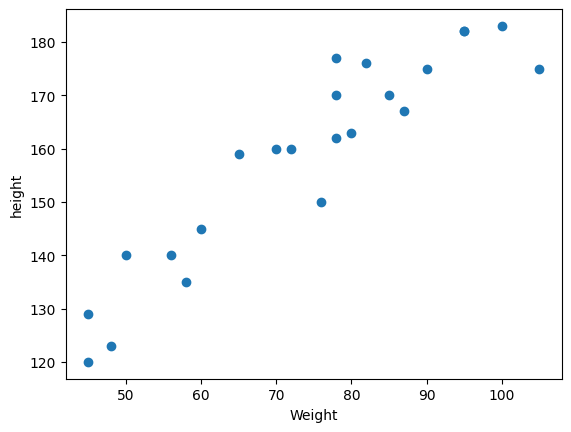

In [5]:
## Scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("height")

In [6]:
## correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


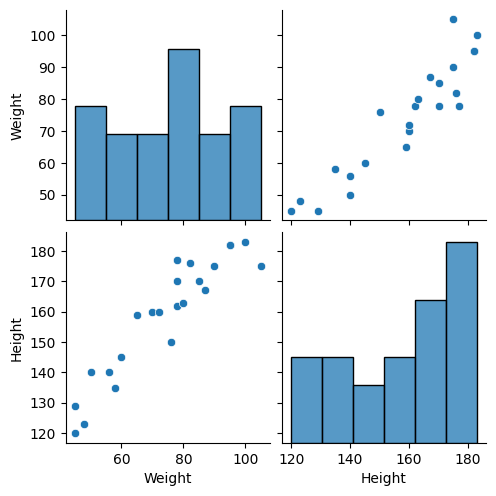

In [7]:
## seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [8]:
## independent and dependent features
X=df[['Weight']]  ## here the independent feature should be dataframe or 2d array
Y=df['Height'] ## dependent features can be in series or 1d array


In [9]:
## Train Test split 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [10]:
X_train.shape

(17, 1)

In [11]:
## Standardization
## We are doing standardization because the independent feature has been in different features,
## so for the independent features we are applying the z score with mean equal to 0 and standard deviation equal to 1
from sklearn.preprocessing import StandardScaler



In [12]:
scaler=StandardScaler()
X_Train=scaler.fit_transform(X_train)
## here all the datapoints are transformed with mean to 0 and standard deviation to 1
## only for train data we use fit transform , for test data we use transform

In [13]:
X_test=scaler.transform(X_test)

In [14]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [15]:
## Apply simple linear regression
from sklearn.linear_model import LinearRegression

In [16]:
regression=LinearRegression(n_jobs=-1)

In [17]:
regression.fit(X_Train,Y_train)

LinearRegression(n_jobs=-1)

In [18]:
print("coefficient or slope:",regression.coef_)
print("Intercept",regression.intercept_)
# here how the slope is defined as for 1 linear movement in x axis it leads to 17 unit movement in the y axis


coefficient or slope: [17.2982057]
Intercept 156.47058823529412


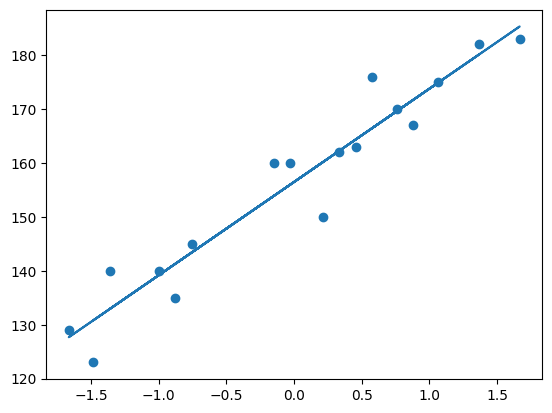

In [19]:
## plot training data for best fit line 
plt.scatter(X_Train,Y_train)
plt.plot(X_Train,regression.predict(X_Train))

## prediction for the test data
1. predicted height output = intercept + coef_(Weights)
2. y_pred_test = 160.76 + 17.849(X_test)

In [20]:
## prediction for the test data 
y_pred=regression.predict(X_test)

In [21]:
## performance metrics 
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [22]:
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


R square
Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [23]:
from sklearn.metrics import r2_score

In [24]:
score=r2_score(Y_test,y_pred)
print(score)

0.7360826717981276


Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [25]:
#display adjusted r-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.6701033397476595

## using OLS

In [28]:
import statsmodels.api as sm

In [29]:
model = sm.OLS(Y_train,X_Train).fit()
prediction=model.predict(X_test)

In [30]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Tue, 08 Apr 2025   Prob (F-statistic):                       0.664
Time:                        17:51:34   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\Sandeep\Data_science_and_ML\my_env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)
